In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])
start_date = dt.datetime(2021, 9, 1)
end_date = dt.datetime(2022, 2, 4)
filtered_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]
print(filtered_data)


           Date    Open    High     Low   Close
2144 2021-09-01  214.00  214.25  207.90  211.10
2145 2021-09-02  211.90  213.75  208.70  209.50
2146 2021-09-03  210.00  211.25  206.40  207.60
2147 2021-09-06  207.60  209.50  203.20  204.10
2148 2021-09-07  211.35  217.00  209.60  212.45
...         ...     ...     ...     ...     ...
2220 2021-12-22  202.90  207.80  201.35  205.00
2221 2021-12-23  206.00  206.85  202.05  202.95
2222 2021-12-24  203.90  203.90  199.35  201.00
2223 2021-12-27  200.00  222.00  196.00  218.35
2224 2021-12-28  219.65  220.45  211.55  212.35

[81 rows x 5 columns]


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [5]:
column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2225, 1)


In [7]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np
trends = ['n', 't', 'c', 'ct']
orders = [(0, 0, 1), (0, 0, 2)]
from statsmodels.tsa.arima.model import ARIMA

# Define the rmsemape function
def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return np.sqrt(mse), mape

for td in trends:
    model = ARIMA(X_train, order=(0, 0, 10), trend=td)
    model_fit = model.fit()
    y_pred = model_fit.predict(start=len(X_train), end=len(data1) - 1)

    # Calculate RMSE and MAPE
    mse, mape = rmsemape(y_test, y_pred)
    print("Trend={} - RMSE: {:.2f}, MAPE: {:.2f}%".format(td, mse, mape))

    print("************")


Trend=n - RMSE: 0.10, MAPE: 96.60%
************
Trend=t - RMSE: 0.01, MAPE: 7.75%
************
Trend=c - RMSE: 0.08, MAPE: 82.12%
************


C:\Users\sony\Anaconda3\envs\AIMLL\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=ct - RMSE: 0.28, MAPE: 282.20%
************


In [10]:
len(y_pred)

111

In [11]:

td = "c"
model = ARIMA(X_train, order=(0, 0, 30), trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(start=len(X_train), end=len(data1) - 1)

mse, mape = rmsemape(y_test, y_pred)
print("Trend={} - RMSE: {:.2f}, MAPE: {:.2f}%".format(td, mse, mape))

print("************")


C:\Users\sony\Anaconda3\envs\AIMLL\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=c - RMSE: 0.08, MAPE: 75.67%
************


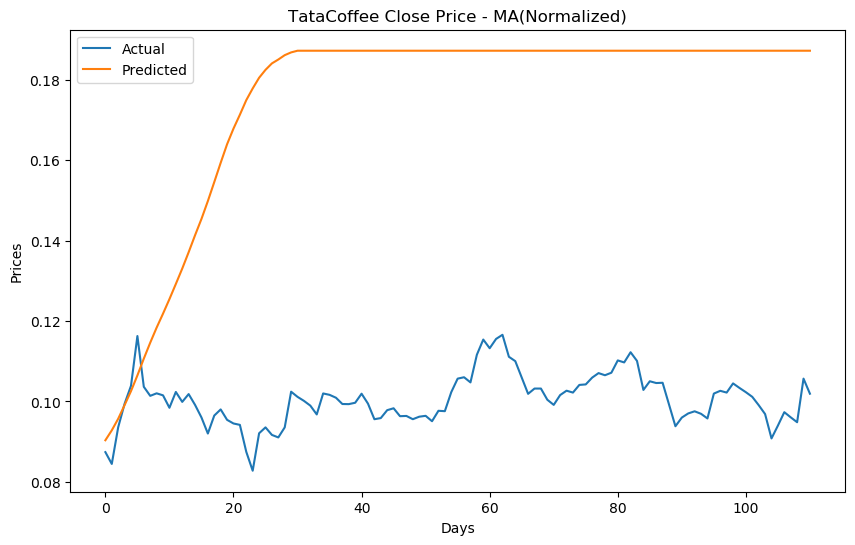

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA(Normalized)')
plt.legend()
plt.show()


In [13]:
len(data1)

2225

In [14]:
aTestNormTable = pd.DataFrame({'Close': np.array(y_test).flatten()})
print(aTestNormTable.head())
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

      Close
0  0.087378
1  0.084438
2  0.093570
3  0.099418
4  0.103890


In [15]:
y_test_series = pd.Series(y_test.flatten())  
aTestNormTable = pd.DataFrame({'Close': y_test_series})


actual_stock_price_test_ori_series = pd.Series(actual_stock_price_test_ori.flatten()) 

actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_series})

Ms = MinMaxScaler()
Ms.fit(actual_stock_price_test_oriA[['Close']])  
actual_stock_price_test_oriA[['Close']] = Ms.inverse_transform(actual_stock_price_test_oriA[['Close']])


In [16]:
y_pred_series = pd.Series(y_pred)
pTestNormTable = pd.DataFrame({'Close': y_pred_series})
column_index = X_test.shape[1] - 1 
Ms.fit(X_test[:, column_index].reshape(-1, 1))
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame({'Close': predicted_stock_price_test_ori.flatten()})

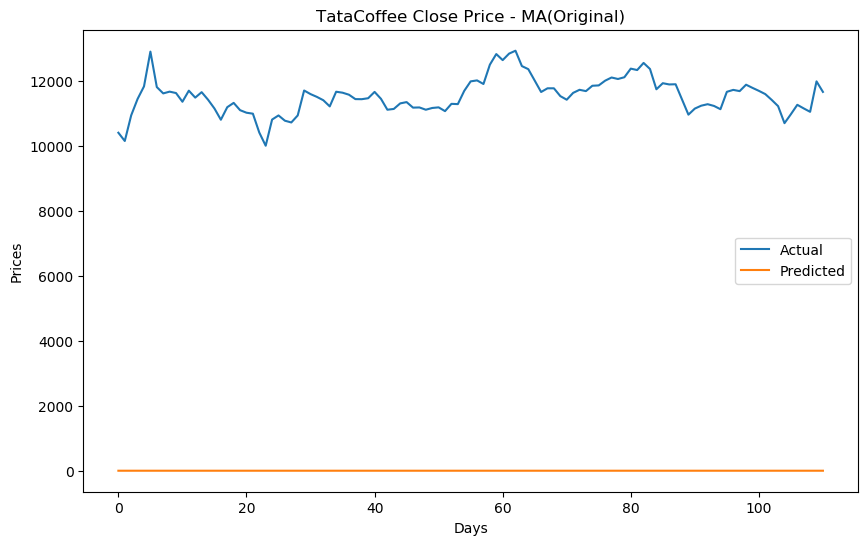

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA(Original)')
plt.legend()
plt.show()



In [18]:
def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

rmse, mape = rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)


In [19]:
forecast=model_fit.predict(len(data1), len(data1)+3)
forecast

array([0.18729615, 0.18729615, 0.18729615, 0.18729615])

In [20]:
fTestNormTable = pd.DataFrame({'Closefore': forecast})
Ms.fit(fTestNormTable[['Closefore']].values.reshape(-1, 1))  # Fit the scaler on the original data
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])
forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]})

In [21]:
forecast_stock_price_test_oriF

,Closefore
0,0.374592
1,0.374592
2,0.374592
3,0.374592


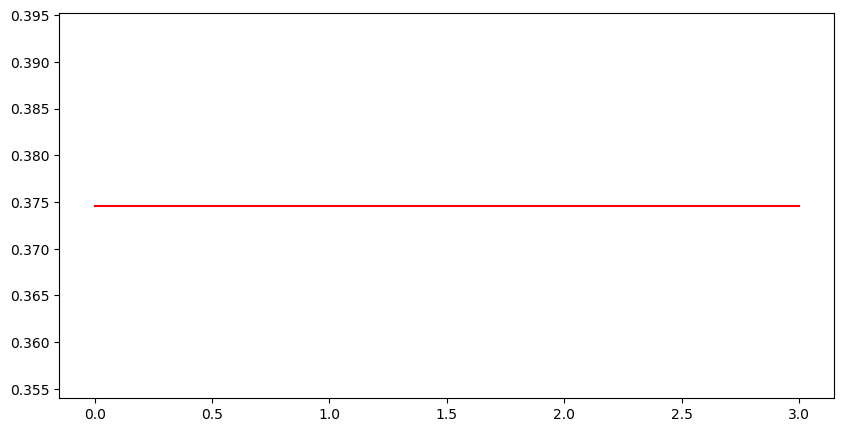

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")